In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data Analysis
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


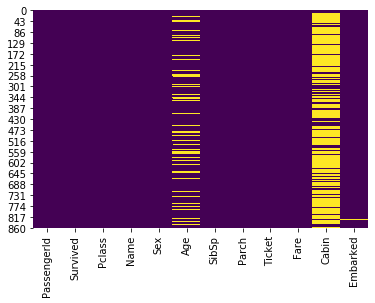

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

#it is quite clear that number of null values are high in Cabin better to delete it age also has null values but we are gonna keep it


In [7]:
sns.set_style("whitegrid")

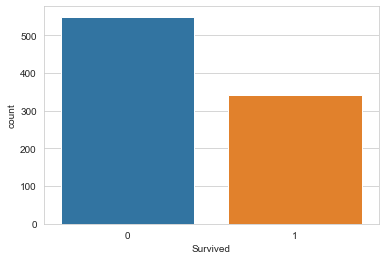

In [8]:
#survivors vs non-survivors
sns.countplot(x="Survived",data = df)

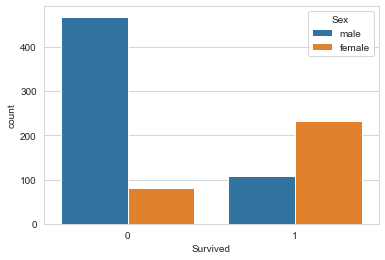

In [9]:
sns.countplot(x="Survived",hue="Sex",data = df)
#more female survivors than male survivors

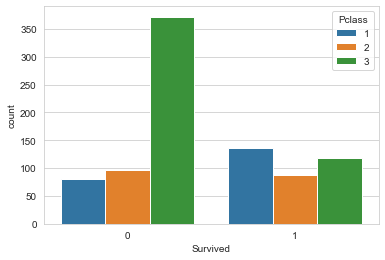

In [10]:
sns.countplot(x="Survived",hue="Pclass",data = df)

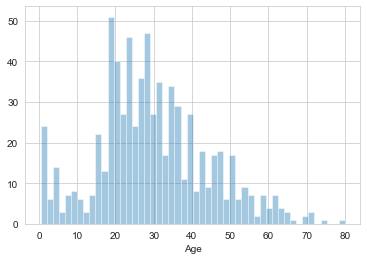

In [11]:
sns.distplot(df["Age"].dropna(),bins=50,kde=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


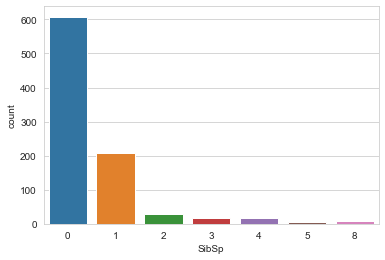

In [13]:
sns.countplot(x="SibSp",data=df)
#most people didnt have a family member

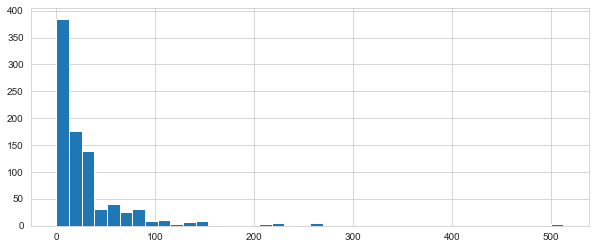

In [14]:
df["Fare"].hist(bins=40,figsize=(10,4))

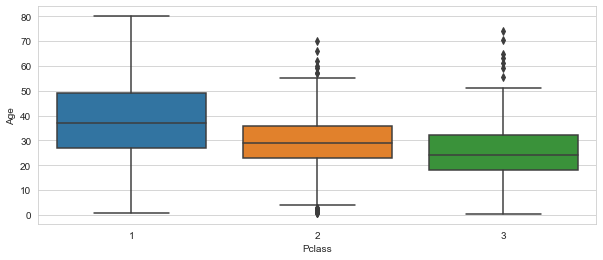

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x="Pclass",y="Age",data=df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


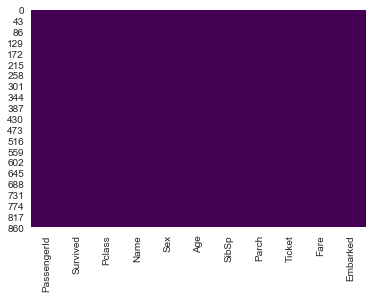

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age
        
    

df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

df.drop("Cabin",axis=1,inplace=True)

sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

df.dropna(inplace=True)

#dealing with categorical features
df.info()

#creating dummy for Sex
sex = pd.get_dummies(df["Sex"],drop_first=True)

sex

embark = pd.get_dummies(df["Embarked"],drop_first=True)

df = pd.concat([df,sex,embark],axis=1)

df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

df.head()

df.drop("PassengerId",axis=1,inplace=True)

df

In [17]:
test = pd.read_csv("test.csv")

In [18]:
X = df.drop("Survived",axis=1) 
y = df["Survived"]

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(X,y)

C:\Users\Levovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


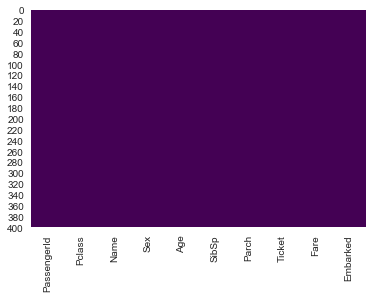

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age
        
    

test["Age"] = test[["Age","Pclass"]].apply(impute_age,axis=1)

sns.heatmap(test.isnull(),cbar=False,cmap="viridis")

test.drop("Cabin",axis=1,inplace=True)

sns.heatmap(test.isnull(),cbar=False,cmap="viridis")



#dealing with categorical features
test.info()

#creating dummy for Sex
sex = pd.get_dummies(test["Sex"],drop_first=True)

sex

embark = pd.get_dummies(test["Embarked"],drop_first=True)

test = pd.concat([test,sex,embark],axis=1)

test.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

test.head()

test.drop("PassengerId",axis=1,inplace=True)

test

In [29]:
test.Fare.isnull()

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [23]:
y_pred = logmodel.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
len(y_pred)

In [ ]:
pd.DataFrame(y_pred).to_csv("file.csv")

In [ ]:
len(y_pred)